In [5]:
import __init__

from lifting import PoseEstimator
from lifting.utils import draw_limbs
from lifting.utils import plot_pose

import cv2
import matplotlib.pyplot as plt
from os.path import dirname, realpath

DIR_PATH = dirname(realpath("demo.py"))
PROJECT_PATH = realpath(DIR_PATH + '/..')
IMAGE_FILE_PATH = PROJECT_PATH + '/data/images/humpback_side.jpg'
IMAGE_TEST_FILE_PATH = '/Users/juanmurphy/Documents/ENV/PhysicalCorrrectionPose/knee_normal.jpg'
SAVED_SESSIONS_DIR = PROJECT_PATH + '/data/saved_sessions'
SESSION_PATH = SAVED_SESSIONS_DIR + '/init_session/init'
PROB_MODEL_PATH = SAVED_SESSIONS_DIR + '/prob_model/prob_model_params.mat'

In [6]:
def display_results(in_image, data_2d, joint_visibility, data_3d):
    """Plot 2D and 3D poses for each of the people in the image."""
    plt.figure()
    draw_limbs(in_image, data_2d, joint_visibility)
    plt.imshow(in_image)
    plt.axis('off')

    # Show 3D poses
    for single_3D in data_3d:
        # or plot_pose(Prob3dPose.centre_all(single_3D))
        plot_pose(single_3D)

    plt.show()

(2448, 3264, 3)


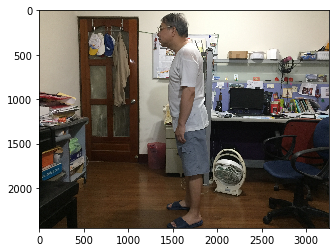

In [7]:
image = cv2.imread(IMAGE_FILE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # conversion to rgb
# create pose estimator
image_size = image.shape
print(image_size)
plt.imshow(image)

In [8]:
pose_estimator = PoseEstimator(image_size, SESSION_PATH, PROB_MODEL_PATH)

# load model
pose_estimator.initialise()










Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/juanmurphy/Documents/ENV/PhysicalCorrrectionPose/Lifting-from-the-Deep-release/data/saved_sessions/init_session/init


(1, 3, 17)
[[[  75.44698182   41.80321598   41.77477486   43.7005323    82.7429422
     80.34837623   48.16474102   63.24364928  -44.7474311  -143.13065918
   -178.48433875   21.74735754   41.69607114  -49.96651265    6.18603871
    -64.77414072  -70.19162674]
  [   9.58179068  160.26451422  149.88780894  115.8500805  -141.10087804
   -155.23465004 -101.74865332    9.48103666   -2.41415351  -13.86433657
     -9.05279662 -158.47693988 -275.37751698 -274.12960551  158.37117588
    280.52842962  247.97824872]
  [ -79.56989007  -98.33712988 -453.6535117  -815.22004619  -98.44650223
   -452.97332229 -815.8807984   206.88031499  558.64488425  566.29509579
    738.02536802  508.44567094  164.24536826 -110.05794379  508.33868125
    167.52760028  -72.66048353]]]
[[[ 160 1344]
  [ 373 1557]
  [ 426 1663]
  [ 905 1503]
  [1224 1557]
  [ 426 1663]
  [ 905 1663]
  [1277 1557]
  [1277 1663]
  [1703 1716]
  [2129 1663]
  [1277 1716]
  [1703 1769]
  [2129 1663]]]


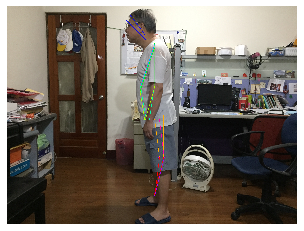

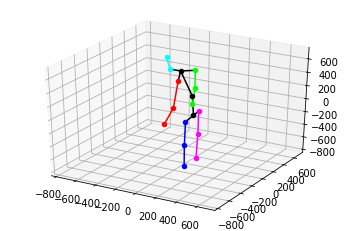

In [10]:
try:
    # estimation
    pose_2d, visibility, pose_3d = pose_estimator.estimate(image)
    print(pose_3d.shape)
    print(pose_3d)
    print(pose_2d)

    # Show 2D and 3D poses
    display_results(image, pose_2d, visibility, pose_3d)
    
except ValueError:
    print('No visible people in the image. Change CENTER_TR in packages/lifting/utils/config.py ...')

In [ ]:
# close model
pose_estimator.close()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

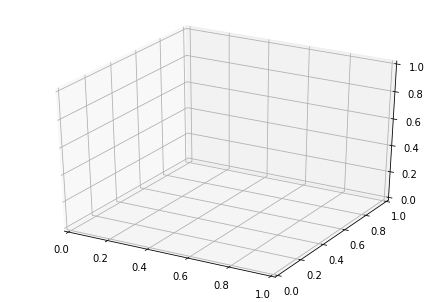

In [12]:
fig = plt.figure()
ax = Axes3D(fig)

In [13]:
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的網格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

In [17]:
Z.shape

(32, 32)

In [14]:
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1,color='black',linewidth=0.5)

In [15]:
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))

In [33]:
import numpy as np
import vg
 
# vec1 = np.array([-22.534289065288164, -1.1368479055116205, 264.3201134494443])
vec1 = np.array([102.14333733217387, -5.2384729902705525, -169.9878037494699])
vec2 = np.array([0,0,1])

vg.angle(vec1, vec2)

148.9656879951348

In [19]:
angle

1.5707963267948966

In [28]:
def angle(v1, v2):
    dx1 = v1[2] - v1[0]
    dy1 = v1[3] - v1[1]
    dx2 = v2[2] - v2[0]
    dy2 = v2[3] - v2[1]
    angle1 = math.atan2(dy1, dx1)
    angle1 = int(angle1 * 180/math.pi)
    # print(angle1)
    angle2 = math.atan2(dy2, dx2)
    angle2 = int(angle2 * 180/math.pi)
    # print(angle2)
    if angle1*angle2 >= 0:
        included_angle = abs(angle1-angle2)
    else:
        included_angle = abs(angle1) + abs(angle2)
        if included_angle > 180:
            included_angle = 360 - included_angle
    return included_angle

In [30]:
ab = [-1.10207852e+02, -8.41979944e+02, -2.72940040e-02, -4.90222615e+01]
cd = [-1.10207852e+02, -8.41979944e+02, -1.16414191e+00,2.15297852e+02]

In [32]:
import math
angle(ab, cd)

2

In [1]:
import bpy
from mathutils import Vector, Matrix
obj = bpy.data.objects['Armature']
pb  = obj.pose.bones['Bone.001']
# constant
VEC_Y = Vector((0.0, 1.0, 0.0))
# components
loc, rot, scale = pb.matrix.decompose()
# projection
y_world = rot * VEC_Y
y_proj = y_world.copy()
y_proj.y = 0.0
factor = y_proj.magnitude
y_proj.normalize()
x_proj = VEC_Y.copy()
z_proj = x_proj.cross(y_proj)
# new world matrix
mat_rot_new = Matrix((x_proj, y_proj, z_proj))
mat_rot_new.transpose()
mat_scale = Matrix.Identity(3)
for i in range(3):
    # uncomment to uniformly scale the bone
    # to match the length of the projected bone
    mat_scale[i][i] = scale[i] # * factor
mat_world_new = mat_rot_new * mat_scale
mat_world_new.resize_4x4()
mat_world_new.translation = loc.copy()
# new local matrix
mat_world_old_inv = pb.matrix.inverted()
mat_basis_new = pb.matrix_basis * mat_world_old_inv * mat_world_new
# pb.matrix_basis = mat_basis_new
def get_mat_offset(pose_bone):
    """ calculate the (local) rest matrix of the bone """
    bone = pose_bone.bone
    mat_offset = bone.matrix.to_4x4()
    mat_offset.translation = bone.head.copy()
    mat_offset.translation.y += bone.parent.length
    return mat_offset
# ================================ Debug =====================================
# visualize source and target transformation with an empty for easy testing
def get_empty(name):
    empty = bpy.data.objects.get(name)
    if empty is None:
        empty = bpy.data.objects.new(name, None)
        empty.show_x_ray = True
        empty.empty_draw_type = "ARROWS"
        bpy.context.scene.objects.link(empty)
    return empty
mat_parent = pb.parent.matrix
mat_offset = get_mat_offset(pb)
get_empty("Source").matrix_world = mat_parent * mat_offset * pb.matrix_basis
get_empty("Target").matrix_world = mat_parent * mat_offset * mat_basis_new
for child in pb.children:
    # adjust the children bones so their world matrix remains unchanged
    mat_offset = get_mat_offset(child)
    mat_offset_inv = mat_offset.inverted()
    mat_basis_new_inv = mat_basis_new.inverted()
    mat_basis_child = (mat_offset_inv * 
                       mat_basis_new_inv * 
                       pb.matrix_basis * 
                       mat_offset * 
                       child.matrix_basis)
    if child.bone.use_connect == True:
        mat_basis_child.translation = 0.0, 0.0, 0.0
    get_empty("PB_" + child.name).matrix_world = mat_world_new * mat_offset * mat_basis_child

ModuleNotFoundError: No module named 'bpy'